In [22]:
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
import pylab
%matplotlib inline

In [2]:
data = pd.read_csv('homework.csv')

In [5]:
data.head(20)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [7]:
data.shape

(333, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [9]:
data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [10]:
data.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

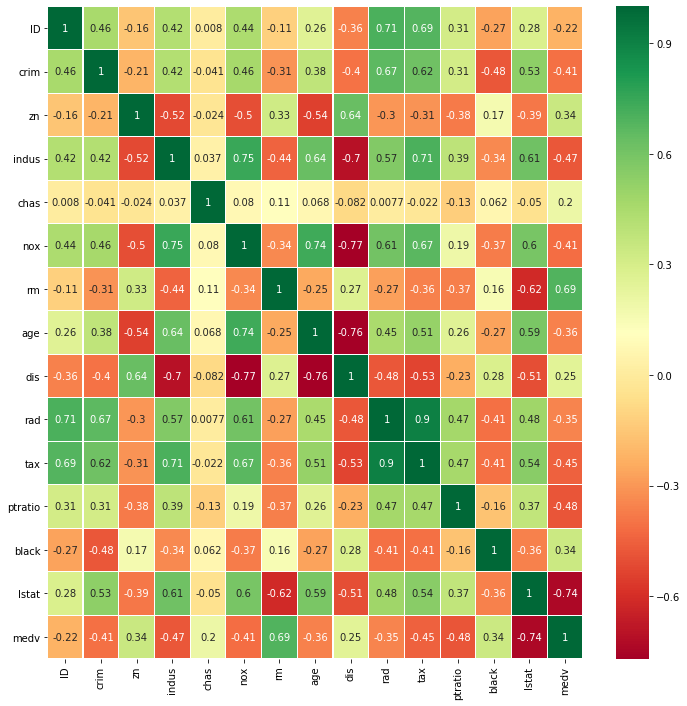

In [23]:
#Нужно выбрать столбцы, построим матрицу корреляций
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [50]:
#Выбираем столбцы
data_filtered = data[['crim', 'indus','nox', 'rm', 'age', 'dis','tax', 'ptratio','lstat', 'medv']]

In [51]:
data_filtered.head()

,crim,indus,nox,rm,age,dis,tax,ptratio,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242,17.8,9.14,21.6
2,0.03237,2.18,0.458,6.998,45.8,6.0622,222,18.7,2.94,33.4
3,0.06905,2.18,0.458,7.147,54.2,6.0622,222,18.7,5.33,36.2
4,0.08829,7.87,0.524,6.012,66.6,5.5605,311,15.2,12.43,22.9


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

In [53]:
# Формируем признаки и целевую переменную
X, y = data_filtered[['crim', 'indus','nox', 'rm', 'age', 'dis','tax', 'ptratio','lstat']], data_filtered['medv']

In [54]:
# Разделяем данные на данные для обучения и проверки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
X_train.head()

,crim,indus,nox,rm,age,dis,tax,ptratio,lstat
118,0.13914,4.05,0.510,5.572,88.5,2.5961,296,16.6,14.69
206,0.34940,9.90,0.544,5.972,76.7,3.1025,304,18.4,9.97
66,0.11504,2.89,0.445,6.163,69.6,3.4952,276,18.0,11.34
36,0.02055,0.74,0.410,6.383,35.7,9.1876,313,17.3,5.77
291,9.32909,18.10,0.713,6.185,98.7,2.2616,666,20.2,18.13


In [56]:
y_train.head()

118    23.1
206    20.3
66     21.4
36     24.7
291    14.1
Name: medv, dtype: float64

In [57]:
# Приводим данные к одному масштабу
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
X_train

array([[-0.43203862, -1.0435831 , -0.41185491, ..., -0.652981  ,
        -0.84267292,  0.28415158],
       [-0.40435066, -0.20427439, -0.11139142, ..., -0.60593684,
        -0.01588646, -0.38459829],
       [-0.43521222, -1.21001012, -0.98627041, ..., -0.77059142,
        -0.19961678, -0.19049081],
       ...,
       [-0.33816082, -0.45678436, -0.16441439, ..., -0.58829527,
         1.17836066,  0.16230309],
       [-0.44448543, -0.92737112, -1.15417647, ..., -0.74118882,
         0.25970903, -0.7742301 ],
       [-0.44274983, -1.2717029 , -0.60627246, ..., -1.25867466,
        -0.29148194, -1.08310186]])

In [59]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [60]:
X_train.head()

,crim,indus,nox,rm,age,dis,tax,ptratio,lstat
0,-0.432039,-1.043583,-0.411855,-0.975088,0.695707,-0.555722,-0.652981,-0.842673,0.284152
1,-0.404351,-0.204274,-0.111391,-0.387702,0.269056,-0.292032,-0.605937,-0.015886,-0.384598
2,-0.435212,-1.210010,-0.986270,-0.107225,0.012342,-0.087547,-0.770591,-0.199617,-0.190491
3,-0.447655,-1.518474,-1.295571,0.215837,-1.213375,2.876570,-0.553012,-0.521145,-0.979672
4,0.778134,0.972193,1.382089,-0.074919,1.064507,-0.729901,1.522812,0.810900,0.771546


In [61]:
X_test.head()

,crim,indus,nox,rm,age,dis,tax,ptratio,lstat
0,-0.442738,-0.753771,-1.304408,-0.525738,-1.730418,1.476055,-0.364835,0.213776,-0.649548
1,-0.250330,1.184530,0.427675,3.141017,0.890954,-0.781764,-0.023765,-1.715392,-1.326799
2,-0.449529,-1.293224,-0.164414,0.497782,-0.146748,0.222174,-0.652981,-1.439796,-1.091603
3,-0.445439,-0.880026,-0.367669,0.108639,-1.112136,1.455435,-1.076379,0.810900,-0.840822
4,-0.446723,-1.201402,-1.136502,0.527151,-1.715955,0.904883,-0.911724,-0.061819,-1.185115


In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
#Создаем и обучаем модель
model = LinearRegression().fit(X_train, y_train)

In [74]:
#Предсказание
y_pred = model.predict(X_test)
y_pred

array([22.5445243 , 41.0904368 , 31.68443506, 21.87771404, 29.33799491,
       17.48124143, 10.12468844, 13.10121501, 27.60485103, 31.0488777 ,
       18.04629779, 21.73114418, 27.7005888 ,  3.08525588, 23.73040826,
       19.82720378, 26.38498122, 30.70434693, 15.98658289, 24.81355566,
       25.31355319, 24.52959153, 28.14539052,  3.03204641, 16.4999949 ,
       24.35115206, 11.44756972, 20.80167999, 25.90915296, 21.51183866,
       20.61185934, 18.05043736, 19.30338263, 22.18398454,  8.50316949,
       20.6994765 , 31.32318062, 22.37498579, 16.10227632, 32.6636991 ,
       23.1150489 , 27.21190054, 29.48147787, 25.94237272, 18.04382113,
       36.32621162, 18.17049885, 40.33061521, 27.45614992, 28.60142291,
       20.08289366, 39.31069936, 19.43014855, 23.80229368, 27.68894088,
       19.06746361, 15.46122203, 27.90434673, 18.04074248, 24.45334093,
       16.3505173 , 15.83433755, 34.37894133, 32.10320454, 27.86832707,
       28.87949997, 27.68759629])

In [66]:
#Оценим точность модели
model.score(X_test, y_test)

0.7150314061189749

In [81]:
#Качество регрессии
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [84]:
print("Mean squared error: %.2f "
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 25.07 
Variance score: 0.72


In [85]:
#Попробуем то же самое с Decision Tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [86]:
regr = DecisionTreeRegressor(max_depth=4)

In [87]:
regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [89]:
#Предсказание
y_regr = regr.predict(X_test)
y_regr

array([21.56293103, 48.8       , 27.65769231, 21.56293103, 27.65769231,
       14.24615385, 15.99047619,  9.89545455, 21.56293103, 27.65769231,
       15.99047619, 21.56293103, 27.65769231,  9.89545455, 21.56293103,
       15.99047619, 21.56293103, 48.8       , 15.99047619, 21.56293103,
       21.56293103, 21.56293103, 27.65769231,  9.89545455, 21.56293103,
       27.65769231,  9.89545455, 14.24615385, 21.56293103, 21.56293103,
       21.56293103, 21.56293103, 21.56293103, 21.56293103, 15.99047619,
       21.56293103, 27.65769231, 29.74285714, 21.56293103, 29.74285714,
       21.56293103, 21.56293103, 21.56293103, 21.56293103, 21.56293103,
       43.5       , 21.56293103, 48.8       , 27.65769231, 27.65769231,
       21.56293103, 48.        , 21.56293103, 21.56293103, 27.65769231,
       21.45      , 15.99047619, 27.65769231, 21.45      , 21.56293103,
       14.24615385, 21.45      , 48.8       , 48.8       , 21.56293103,
       27.65769231, 34.52941176])

In [90]:
#Оценка
print("Mean squared error: %.2f "
      % mean_squared_error(y_test, y_regr))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_regr))

Mean squared error: 18.78 
Variance score: 0.79
